<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# Etape 1 - Importation des librairies et chargements des fichiers

## 1. 1 - Importation des librairies

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn.objects as so


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
print (os.getcwd())

/content


In [4]:
os.chdir(r"/content/gdrive/My Drive/Colab Notebooks/Formation/P4")

In [5]:
pd.options.display.max_columns=999
pd.set_option('display.float_format', '{:.3f}'.format)


## 1. 2 - Chargement des fichiers Excel

In [ ]:
#Importation du fichier population.csv
pop = pd.read_csv('population.csv')
print(pop)

#Importation du fichier dispo_alimentaire.csv
dispo_ali = pd.read_csv('dispo_alimentaire.csv')
print(dispo_ali)

#Importation du fichier aide_alimentaire.csv
aide_ali = pd.read_csv('aide_alimentaire.csv')
print(aide_ali)

#Importation du fichier sous_nutrition.csv
sous_nut = pd.read_csv('sous_nutrition.csv')
print(sous_nut)

             Zone  Année    Valeur
0     Afghanistan   2013 32269.589
1     Afghanistan   2014 33370.794
2     Afghanistan   2015 34413.603
3     Afghanistan   2016 35383.032
4     Afghanistan   2017 36296.113
...           ...    ...       ...
1411     Zimbabwe   2014 13586.707
1412     Zimbabwe   2015 13814.629
1413     Zimbabwe   2016 14030.331
1414     Zimbabwe   2017 14236.595
1415     Zimbabwe   2018 14438.802

[1416 rows x 3 columns]
               Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    NaN   
1       Afghanistan        Agrumes, Autres  vegetale                    NaN   
2       Afghanistan  Aliments pour enfants  vegetale                    NaN   
3       Afghanistan                 Ananas  vegetale                    NaN   
4       Afghanistan                Bananes  vegetale                    NaN   
...             ...                    ...       ...                    ...   
15

# Etape 2 - Analyse exploratoire des fichiers

## 2. 1 - Analyse exploratoire du fichier population

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(pop.shape[0]))
print("Le tableau comporte {} colonne(s)".format(pop.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

print(pop.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None


In [ ]:
#Affichage les 5 premières lignes de la table
print(pop.head())

          Zone  Année    Valeur
0  Afghanistan   2013 32269.589
1  Afghanistan   2014 33370.794
2  Afghanistan   2015 34413.603
3  Afghanistan   2016 35383.032
4  Afghanistan   2017 36296.113


In [ ]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
pop['Valeur (x1000)'] = pop['Valeur'] *1000
pop.head()


,Zone,Année,Valeur,Valeur (x1000)
0,Afghanistan,2013,32269.589,32269589.000
1,Afghanistan,2014,33370.794,33370794.000
2,Afghanistan,2015,34413.603,34413603.000
3,Afghanistan,2016,35383.032,35383032.000
4,Afghanistan,2017,36296.113,36296113.000


In [ ]:
#changement du nom de la colonne Valeur par Population
pop = pop.rename(columns={'Valeur (x1000)': 'Population'})
pop.head()

,Zone,Année,Valeur,Population
0,Afghanistan,2013,32269.589,32269589.000
1,Afghanistan,2014,33370.794,33370794.000
2,Afghanistan,2015,34413.603,34413603.000
3,Afghanistan,2016,35383.032,35383032.000
4,Afghanistan,2017,36296.113,36296113.000


In [ ]:
#Affichage les 5 premières lignes de la table pour voir les modifications
pop.head()

,Zone,Année,Valeur,Population
0,Afghanistan,2013,32269.589,32269589.000
1,Afghanistan,2014,33370.794,33370794.000
2,Afghanistan,2015,34413.603,34413603.000
3,Afghanistan,2016,35383.032,35383032.000
4,Afghanistan,2017,36296.113,36296113.000


## 2. 2 - Analyse exploratoire du fichier disponibilité alimentaire

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_ali.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_ali.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
dispo_ali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [ ]:
#Affichage les 5 premières lignes de la table
dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.000,1.720,0.200,0.770,53.000,NaN,NaN,53.000,NaN,53.000,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.000,1.290,0.010,0.020,41.000,2.000,40.000,39.000,2.000,3.000,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.000,0.060,0.010,0.030,2.000,NaN,2.000,2.000,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.000,0.000,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.000,2.700,0.020,0.050,82.000,NaN,82.000,82.000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#remplacement des NaN dans le dataset par des 0
dispo_ali = dispo_ali.fillna(0)
print(dispo_ali)

               Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                  0.000   
1       Afghanistan        Agrumes, Autres  vegetale                  0.000   
2       Afghanistan  Aliments pour enfants  vegetale                  0.000   
3       Afghanistan                 Ananas  vegetale                  0.000   
4       Afghanistan                Bananes  vegetale                  0.000   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                  0.000   
15601  Îles Salomon    Viande de Volailles   animale                  0.000   
15602  Îles Salomon          Viande, Autre   animale                  0.000   
15603  Îles Salomon                    Vin  vegetale                  0.000   
15604  Îles Salomon         Épices, Autres  vegetale                  0.000   

       Autres Utilisations  Disponibilité alimentai

In [ ]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_ali['Autres Utilisations Kg'] = dispo_ali['Autres Utilisations'] *1000000
dispo_ali['Disponibilité intérieure Kg'] = dispo_ali['Disponibilité intérieure'] *1000000
dispo_ali['Exportations - Quantité Kg'] = dispo_ali['Exportations - Quantité'] *1000000
dispo_ali['Importations - Quantité Kg'] = dispo_ali['Importations - Quantité'] *1000000
dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations Kg,Disponibilité intérieure Kg,Exportations - Quantité Kg,Importations - Quantité Kg
0,Afghanistan,Abats Comestible,animale,0.000,0.000,5.000,1.720,0.200,0.770,53.000,0.000,0.000,53.000,0.000,53.000,0.000,0.000,0.000,0.000,53000000.000,0.000,0.000
1,Afghanistan,"Agrumes, Autres",vegetale,0.000,0.000,1.000,1.290,0.010,0.020,41.000,2.000,40.000,39.000,2.000,3.000,0.000,0.000,0.000,0.000,41000000.000,2000000.000,40000000.000
2,Afghanistan,Aliments pour enfants,vegetale,0.000,0.000,1.000,0.060,0.010,0.030,2.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,2000000.000,0.000,2000000.000
3,Afghanistan,Ananas,vegetale,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Afghanistan,Bananes,vegetale,0.000,0.000,4.000,2.700,0.020,0.050,82.000,0.000,82.000,82.000,0.000,0.000,0.000,0.000,0.000,0.000,82000000.000,0.000,82000000.000


In [ ]:
#Affichage les 5 premières lignes de la table
dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations Kg,Disponibilité intérieure Kg,Exportations - Quantité Kg,Importations - Quantité Kg
0,Afghanistan,Abats Comestible,animale,0.000,0.000,5.000,1.720,0.200,0.770,53.000,0.000,0.000,53.000,0.000,53.000,0.000,0.000,0.000,0.000,53000000.000,0.000,0.000
1,Afghanistan,"Agrumes, Autres",vegetale,0.000,0.000,1.000,1.290,0.010,0.020,41.000,2.000,40.000,39.000,2.000,3.000,0.000,0.000,0.000,0.000,41000000.000,2000000.000,40000000.000
2,Afghanistan,Aliments pour enfants,vegetale,0.000,0.000,1.000,0.060,0.010,0.030,2.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,2000000.000,0.000,2000000.000
3,Afghanistan,Ananas,vegetale,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Afghanistan,Bananes,vegetale,0.000,0.000,4.000,2.700,0.020,0.050,82.000,0.000,82.000,82.000,0.000,0.000,0.000,0.000,0.000,0.000,82000000.000,0.000,82000000.000


## 2. 3 - Analyse exploratoire du fichier aide alimentaire

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_ali.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_ali.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
aide_ali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [ ]:
#Affichage les 5 premières lignes de la table
aide_ali.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_ali = aide_ali.rename(columns={'Pays bénéficiaire': 'Zone'})
aide_ali.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_ali['Valeur Kg'] = aide_ali['Valeur']*1000
aide_ali.head()

,Zone,Année,Produit,Valeur,Valeur Kg
0,Afghanistan,2013,Autres non-céréales,682,682000
1,Afghanistan,2014,Autres non-céréales,335,335000
2,Afghanistan,2013,Blé et Farin,39224,39224000
3,Afghanistan,2014,Blé et Farin,15160,15160000
4,Afghanistan,2013,Céréales,40504,40504000


In [ ]:
#Affichage les 5 premières lignes de la table
aide_ali.head()

,Zone,Année,Produit,Valeur,Valeur Kg
0,Afghanistan,2013,Autres non-céréales,682,682000
1,Afghanistan,2014,Autres non-céréales,335,335000
2,Afghanistan,2013,Blé et Farin,39224,39224000
3,Afghanistan,2014,Blé et Farin,15160,15160000
4,Afghanistan,2013,Céréales,40504,40504000


## 2. 4 - Analyse exploratoire du fichier sous-nutrition

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nut.shape[0]))

Le tableau comporte 1218 observation(s) ou article(s)


In [ ]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(sous_nut.shape[1]))

Le tableau comporte 3 colonne(s)


In [ ]:
#Afficher les 5 premières lignes de la table
sous_nut.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
#Conversion de la colonne sous nutrition en numérique
sous_nut['Valeur'].value_counts()
sous_nut['Valeur'].replace('<0.1', np.nan, inplace=True)

sous_nut['Valeur'] = pd.to_numeric(sous_nut['Valeur'], errors='coerce')
sous_nut.head()


<ipython-input-16-1c3bfce43e97>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sous_nut['Valeur'].replace('<0.1', np.nan, inplace=True)


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.600
1,Afghanistan,2013-2015,8.800
2,Afghanistan,2014-2016,8.900
3,Afghanistan,2015-2017,9.700
4,Afghanistan,2016-2018,10.500


In [ ]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nut['Valeur'].value_counts()
sous_nut['Valeur'].replace('<0.1', 0, inplace=True)

sous_nut['Valeur'] = pd.to_numeric(sous_nut['Valeur'], errors='coerce')
sous_nut.head()

<ipython-input-17-aff541f7f7e6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sous_nut['Valeur'].replace('<0.1', 0, inplace=True)


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.600
1,Afghanistan,2013-2015,8.800
2,Afghanistan,2014-2016,8.900
3,Afghanistan,2015-2017,9.700
4,Afghanistan,2016-2018,10.500


In [ ]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nut = sous_nut.rename(columns={'Valeur': 'sous_nutrition'})
sous_nut.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.600
1,Afghanistan,2013-2015,8.800
2,Afghanistan,2014-2016,8.900
3,Afghanistan,2015-2017,9.700
4,Afghanistan,2016-2018,10.500


In [ ]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nut['sous_nutrition (x 1 million)'] = sous_nut['sous_nutrition']*1000000
sous_nut.head()

,Zone,Année,sous_nutrition,sous_nutrition (x 1 million)
0,Afghanistan,2012-2014,8.600,8600000.000
1,Afghanistan,2013-2015,8.800,8800000.000
2,Afghanistan,2014-2016,8.900,8900000.000
3,Afghanistan,2015-2017,9.700,9700000.000
4,Afghanistan,2016-2018,10.500,10500000.000


In [ ]:
#Afficher les 5 premières lignes de la table
sous_nut.head()

,Zone,Année,sous_nutrition,sous_nutrition (x 1 million)
0,Afghanistan,2012-2014,8.600,8600000.000
1,Afghanistan,2013-2015,8.800,8800000.000
2,Afghanistan,2014-2016,8.900,8900000.000
3,Afghanistan,2015-2017,9.700,9700000.000
4,Afghanistan,2016-2018,10.500,10500000.000


# Etape 3 - Analyse des données

## 3. 1 - Proportion de personnes en sous-nutrition

In [ ]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
merge_pop_sous_nut = pop.merge(sous_nut, how='left', on=['Zone'], indicator=True)
merge_pop_sous_nut.head()

,Zone,Année_x,Valeur,Population,Année_y,sous_nutrition,sous_nutrition (x 1 million),_merge
0,Afghanistan,2013,32269.589,32269589.000,2012-2014,8.600,8600000.000,both
1,Afghanistan,2013,32269.589,32269589.000,2013-2015,8.800,8800000.000,both
2,Afghanistan,2013,32269.589,32269589.000,2014-2016,8.900,8900000.000,both
3,Afghanistan,2013,32269.589,32269589.000,2015-2017,9.700,9700000.000,both
4,Afghanistan,2013,32269.589,32269589.000,2016-2018,10.500,10500000.000,both


In [ ]:
merge_pop_sous_nut['_merge'].value_counts()

,count
_merge,
both,7308
left_only,198
right_only,0


In [ ]:
merge_pop_sous_nut[merge_pop_sous_nut['_merge']=='left_only']

,Zone,Année_x,Valeur,Population,Année_y,sous_nutrition,sous_nutrition (x 1 million),_merge
252,Anguilla,2013,13.954,13954.000,NaN,NaN,NaN,left_only
253,Anguilla,2014,14.112,14112.000,NaN,NaN,NaN,left_only
254,Anguilla,2015,14.279,14279.000,NaN,NaN,NaN,left_only
255,Anguilla,2016,14.429,14429.000,NaN,NaN,NaN,left_only
256,Anguilla,2017,14.584,14584.000,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
6421,Sint Maarten (partie néerlandaise),2014,38.876,38876.000,NaN,NaN,NaN,left_only
6422,Sint Maarten (partie néerlandaise),2015,39.968,39968.000,NaN,NaN,NaN,left_only
6423,Sint Maarten (partie néerlandaise),2016,40.808,40808.000,NaN,NaN,NaN,left_only
6424,Sint Maarten (partie néerlandaise),2017,41.444,41444.000,NaN,NaN,NaN,left_only


In [ ]:
merge_pop_sous_nut_ax_2017 = merge_pop_sous_nut[merge_pop_sous_nut['Année_x']==2017]
print(merge_pop_sous_nut_ax_2017)

             Zone  Année_x    Valeur   Population    Année_y  sous_nutrition  \
24    Afghanistan     2017 36296.113 36296113.000  2012-2014           8.600   
25    Afghanistan     2017 36296.113 36296113.000  2013-2015           8.800   
26    Afghanistan     2017 36296.113 36296113.000  2014-2016           8.900   
27    Afghanistan     2017 36296.113 36296113.000  2015-2017           9.700   
28    Afghanistan     2017 36296.113 36296113.000  2016-2018          10.500   
...           ...      ...       ...          ...        ...             ...   
7495     Zimbabwe     2017 14236.595 14236595.000  2013-2015             NaN   
7496     Zimbabwe     2017 14236.595 14236595.000  2014-2016             NaN   
7497     Zimbabwe     2017 14236.595 14236595.000  2015-2017             NaN   
7498     Zimbabwe     2017 14236.595 14236595.000  2016-2018             NaN   
7499     Zimbabwe     2017 14236.595 14236595.000  2017-2019             NaN   

      sous_nutrition (x 1 million) _mer

In [ ]:
merge_pop_sous_nut_2017 = merge_pop_sous_nut_ax_2017[merge_pop_sous_nut_ax_2017['Année_y']=='2016-2018']
print(merge_pop_sous_nut_2017)

                                        Zone  Année_x    Valeur   Population  \
28                               Afghanistan     2017 36296.113 36296113.000   
64                            Afrique du Sud     2017 57009.756 57009756.000   
100                                  Albanie     2017  2884.169  2884169.000   
136                                  Algérie     2017 41389.189 41389189.000   
172                                Allemagne     2017 82658.409 82658409.000   
...                                      ...      ...       ...          ...   
7354  Venezuela (République bolivarienne du)     2017 29402.484 29402484.000   
7390                                Viet Nam     2017 94600.648 94600648.000   
7426                                   Yémen     2017 27834.819 27834819.000   
7462                                  Zambie     2017 16853.599 16853599.000   
7498                                Zimbabwe     2017 14236.595 14236595.000   

        Année_y  sous_nutrition  sous_n

In [ ]:
#Affichage du dataset
merge_pop_sous_nut_2017.head()

,Zone,Année_x,Valeur,Population,Année_y,sous_nutrition,sous_nutrition (x 1 million),_merge
28,Afghanistan,2017,36296.113,36296113.000,2016-2018,10.500,10500000.000,both
64,Afrique du Sud,2017,57009.756,57009756.000,2016-2018,3.100,3100000.000,both
100,Albanie,2017,2884.169,2884169.000,2016-2018,0.100,100000.000,both
136,Algérie,2017,41389.189,41389189.000,2016-2018,1.300,1300000.000,both
172,Allemagne,2017,82658.409,82658409.000,2016-2018,NaN,NaN,both


In [ ]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nb_pers = merge_pop_sous_nut_2017['sous_nutrition (x 1 million)'].sum()
print(nb_pers)

535700000.0


In [ ]:
# Calcul de la population mondiale
pop_total_2017 = merge_pop_sous_nut_2017['Population'].sum()
print(pop_total_2017)

7543798779.0


In [ ]:
# Calcul du pourcentage du nombre de personnes en état de sous-nutrition
pourcentage_pers_sous_nut = (nb_pers/pop_total_2017)*100
print(round(pourcentage_pers_sous_nut, 2))

7.1


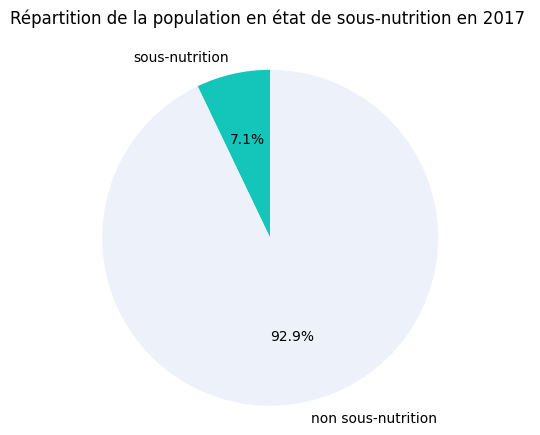

In [ ]:
# Création du graphique sur la répartition de la population en état de sous-nutrition en 2017
y = np.array([pourcentage_pers_sous_nut, (100-pourcentage_pers_sous_nut)])
sous_nut_2017_labels = ["sous-nutrition", "non sous-nutrition"]
couleurs = ['#14c5ba', '#edf2fa']

plt.pie(y, labels=sous_nut_2017_labels, autopct='%1.1f%%', startangle=90, colors=couleurs)
plt.title("Répartition de la population en état de sous-nutrition en 2017 \n")
plt.axis('equal')
plt.show()

## 3. 2 - Nombre théorique de personnes qui pourraient être nourries

In [ ]:
# Combien mange en moyenne un être humain ? Source => %% On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

In [ ]:
# Filtrage du fichier population sur l'année 2017
pop_2017 = pop[pop['Année']==2017]
print(pop_2017)

                                        Zone  Année    Valeur   Population
4                                Afghanistan   2017 36296.113 36296113.000
10                            Afrique du Sud   2017 57009.756 57009756.000
16                                   Albanie   2017  2884.169  2884169.000
22                                   Algérie   2017 41389.189 41389189.000
28                                 Allemagne   2017 82658.409 82658409.000
...                                      ...    ...       ...          ...
1390  Venezuela (République bolivarienne du)   2017 29402.484 29402484.000
1396                                Viet Nam   2017 94600.648 94600648.000
1402                                   Yémen   2017 27834.819 27834819.000
1408                                  Zambie   2017 16853.599 16853599.000
1414                                Zimbabwe   2017 14236.595 14236595.000

[236 rows x 4 columns]


In [ ]:
#Affichage du nouveau dataframe
sum_dispo_ali_kcal = dispo_ali.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

In [ ]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
merge_pop_dispo_ali_kcal = pop_2017.merge(sum_dispo_ali_kcal, how='left', on=['Zone'])
merge_pop_dispo_ali_kcal.head()

,Zone,Année,Valeur,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,36296113.000,2087.000
1,Afrique du Sud,2017,57009.756,57009756.000,3020.000
2,Albanie,2017,2884.169,2884169.000,3188.000
3,Algérie,2017,41389.189,41389189.000,3293.000
4,Allemagne,2017,82658.409,82658409.000,3503.000


In [ ]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
merge_pop_dispo_ali_kcal['total_kcal'] = merge_pop_dispo_ali_kcal['Disponibilité alimentaire (Kcal/personne/jour)']*merge_pop_dispo_ali_kcal['Population']
merge_pop_dispo_ali_kcal.head()

,Zone,Année,Valeur,Population,Disponibilité alimentaire (Kcal/personne/jour),total_kcal
0,Afghanistan,2017,36296.113,36296113.000,2087.000,75749987831.000
1,Afrique du Sud,2017,57009.756,57009756.000,3020.000,172169463120.000
2,Albanie,2017,2884.169,2884169.000,3188.000,9194730772.000
3,Algérie,2017,41389.189,41389189.000,3293.000,136294599377.000
4,Allemagne,2017,82658.409,82658409.000,3503.000,289552406727.000


In [ ]:
#Calcul du nombre d'humains pouvant être nourris
total_dispo_ali_kcal = merge_pop_dispo_ali_kcal['total_kcal'].sum()/2500
print(total_dispo_ali_kcal)

8367593850.9324


In [ ]:
# Pourcentage de la population pouvant théoriquement être nourrie
dispo_ali_mondiale = (total_dispo_ali_kcal/merge_pop_dispo_ali_kcal['Population'].sum())*100
print(round(dispo_ali_mondiale, 2))

110.86


## 3. 3 - Nombre théorique de personnes qui pourraient être nourries avec des produits végétaux

In [ ]:
# Filtrage du fichier disponibilité alimentaire sur l'origine végétale
origine_vegetale = dispo_ali[dispo_ali['Origine']=='vegetale']
origine_vegetale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations Kg,Disponibilité intérieure Kg,Exportations - Quantité Kg,Importations - Quantité Kg
1,Afghanistan,"Agrumes, Autres",vegetale,0.000,0.000,1.000,1.290,0.010,0.020,41.000,2.000,40.000,39.000,2.000,3.000,0.000,0.000,0.000,0.000,41000000.000,2000000.000,40000000.000
2,Afghanistan,Aliments pour enfants,vegetale,0.000,0.000,1.000,0.060,0.010,0.030,2.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,2000000.000,0.000,2000000.000
3,Afghanistan,Ananas,vegetale,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Afghanistan,Bananes,vegetale,0.000,0.000,4.000,2.700,0.020,0.050,82.000,0.000,82.000,82.000,0.000,0.000,0.000,0.000,0.000,0.000,82000000.000,0.000,82000000.000
6,Afghanistan,Bière,vegetale,0.000,0.000,0.000,0.090,0.000,0.000,3.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3000000.000,0.000,3000000.000


In [ ]:
#Transfert des données avec les végétaux dans un nouveau dataframe
origine_vegetale_grouped = origine_vegetale.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
origine_vegetale_grouped.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,1871.000
1,Afrique du Sud,2533.000
2,Albanie,2203.000
3,Algérie,2915.000
4,Allemagne,2461.000


In [ ]:
# Jointure des tables population en 2017 et disponibilité alimentaire d'origine végétale
merge_pop_kcal_vegetale = pop_2017.merge(origine_vegetale_grouped, how='left', on=['Zone'])
merge_pop_kcal_vegetale.head()

,Zone,Année,Valeur,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,36296113.000,1871.000
1,Afrique du Sud,2017,57009.756,57009756.000,2533.000
2,Albanie,2017,2884.169,2884169.000,2203.000
3,Algérie,2017,41389.189,41389189.000,2915.000
4,Allemagne,2017,82658.409,82658409.000,2461.000


In [ ]:
# Création de la colonne totale des calories des produits végétaux
merge_pop_kcal_vegetale['total_kcal_vegetale'] = merge_pop_kcal_vegetale['Disponibilité alimentaire (Kcal/personne/jour)']*merge_pop_kcal_vegetale['Population']
merge_pop_kcal_vegetale.head()

,Zone,Année,Valeur,Population,Disponibilité alimentaire (Kcal/personne/jour),total_kcal_vegetale
0,Afghanistan,2017,36296.113,36296113.000,1871.000,67910027423.000
1,Afrique du Sud,2017,57009.756,57009756.000,2533.000,144405711948.000
2,Albanie,2017,2884.169,2884169.000,2203.000,6353824307.000
3,Algérie,2017,41389.189,41389189.000,2915.000,120649485935.000
4,Allemagne,2017,82658.409,82658409.000,2461.000,203422344549.000


In [ ]:
#Calcul du nombre de calories disponibles pour les végétaux
total_kcal_vegetale = merge_pop_kcal_vegetale['total_kcal_vegetale'].sum()/2500
print(round(total_kcal_vegetale, 2))

6904305684.6


In [ ]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
dispo_ali_mondiale_vegetale = (total_kcal_vegetale/merge_pop_kcal_vegetale['Population'].sum())*100
print(round(dispo_ali_mondiale_vegetale, 2))

91.47


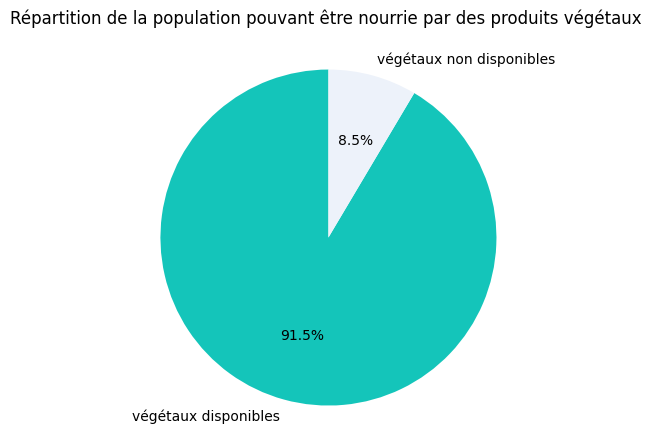

In [ ]:
# Création du graphique sur la répartition de la population pouvant être nourrie par des produits végétaux
y = np.array([dispo_ali_mondiale_vegetale, (100-dispo_ali_mondiale_vegetale)])
part_dispo_ali_vegetale_labels = ["végétaux disponibles", "végétaux non disponibles"]
couleurs = ['#14c5ba', '#edf2fa']

plt.pie(y, labels=part_dispo_ali_vegetale_labels, autopct='%1.1f%%', startangle=90, colors=couleurs)
plt.title("Répartition de la population pouvant être nourrie par des produits végétaux \n")
plt.axis('equal')
plt.show()

## 3. 4 - Utilisation de la disponibilité intérieure

In [ ]:
#Calcul de la disponibilité totale
total_dispo_int = dispo_ali['Disponibilité intérieure'].sum()
print(total_dispo_int)

9848994.0


In [ ]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, semences, traitement et autres utilisations
Liste = ['Aliments pour animaux', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations']

for i in Liste:
    if i in dispo_ali.columns:
        sum = (dispo_ali[i].sum()/total_dispo_int)*100
        print(f"{i} : {round(sum, 2)}")


Aliments pour animaux : 13.24
Nourriture : 49.51
Pertes : 4.61
Semences : 1.57
Traitement : 22.38
Autres Utilisations : 8.78


In [ ]:
# Création du dictionnaire de la boucle
dico = {}
for i in Liste:
    if i in dispo_ali.columns:
        sum = (dispo_ali[i].sum()/total_dispo_int)*100
        dico[i] = round(sum, 2)
print(dico)

{'Aliments pour animaux': np.float64(13.24), 'Nourriture': np.float64(49.51), 'Pertes': np.float64(4.61), 'Semences': np.float64(1.57), 'Traitement': np.float64(22.38), 'Autres Utilisations': np.float64(8.78)}


<function matplotlib.pyplot.show(close=None, block=None)>

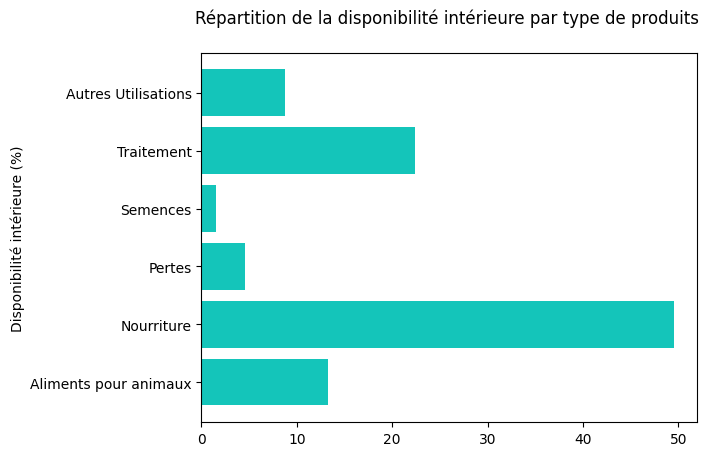

In [ ]:
# Création du graphique sur la répartition de la disponibilité intérieure par type de produits
x = np.array(['Aliments pour animaux', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations'])
y = np.array([dico['Aliments pour animaux'], dico['Nourriture'], dico['Pertes'], dico['Semences'], dico['Traitement'], dico['Autres Utilisations']])

plt.barh(x, y, color = '#14c5ba')
plt.ylabel('Disponibilité intérieure (%)')
plt.title("Répartition de la disponibilité intérieure par type de produits \n")
plt.show

## 3. 5 - Utilisation des céréales

In [ ]:
#Création d'une liste avec toutes les variables
Liste_cereales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Millet', 'Seigle', 'Avoine', 'Sorgho', 'Céréales, Autres']

In [ ]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = dispo_ali[dispo_ali['Produit'].isin(Liste_cereales)]
cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations Kg,Disponibilité intérieure Kg,Exportations - Quantité Kg,Importations - Quantité Kg
7,Afghanistan,Blé,vegetale,0.000,0.000,1369.000,160.230,4.690,36.910,5992.000,0.000,1173.000,4895.000,775.000,5169.000,322.000,0.000,-350.000,0.000,5992000000.000,0.000,1173000000.000
12,Afghanistan,"Céréales, Autres",vegetale,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
32,Afghanistan,Maïs,vegetale,200.000,0.000,21.000,2.500,0.300,0.560,313.000,0.000,1.000,76.000,31.000,312.000,5.000,0.000,0.000,0.000,313000000.000,0.000,1000000.000
34,Afghanistan,Millet,vegetale,0.000,0.000,3.000,0.400,0.020,0.080,13.000,0.000,0.000,12.000,1.000,13.000,0.000,0.000,0.000,0.000,13000000.000,0.000,0.000
40,Afghanistan,Orge,vegetale,360.000,0.000,26.000,2.920,0.240,0.790,524.000,0.000,10.000,89.000,52.000,514.000,22.000,0.000,0.000,0.000,524000000.000,0.000,10000000.000


In [ ]:
#Affichage de la proportion d'alimentation animale
part_ali_animale = (cereales['Aliments pour animaux'].sum()/cereales['Disponibilité intérieure'].sum())*100
print(round(part_ali_animale, 2))

36.29


In [ ]:
#Affichage de la proportion d'alimentation humaine
part_ali_humaine = (cereales['Nourriture'].sum()/cereales['Disponibilité intérieure'].sum())*100
print(round(part_ali_humaine, 2))

42.75


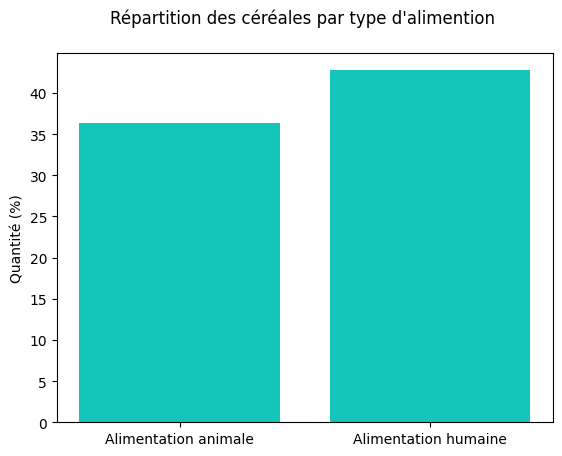

In [ ]:
# Création du graphique sur la répartition des céréales par type d'alimentation
x = np.array(["Alimentation animale", "Alimentation humaine"])
y = np.array([part_ali_animale, part_ali_humaine])

plt.bar(x, y, color = '#14c5ba')
plt.ylabel("Quantité (%)")
plt.title("Répartition des céréales par type d'alimention \n")
plt.show()

## 3. 6 - Pays avec la proportion de personnes sous-alimentées la plus forte en 2017

In [ ]:
#Création de la colonne proportion par pays
merge_pop_sous_nut_2017.loc[:, 'part_sous_nut'] = (merge_pop_sous_nut_2017['sous_nutrition (x 1 million)'] / merge_pop_sous_nut_2017['Population']) * 100
merge_pop_sous_nut_2017.head()

<ipython-input-74-feb243bbd2c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_pop_sous_nut_2017.loc[:, 'part_sous_nut'] = (merge_pop_sous_nut_2017['sous_nutrition (x 1 million)'] / merge_pop_sous_nut_2017['Population']) * 100


,Zone,Année_x,Valeur,Population,Année_y,sous_nutrition,sous_nutrition (x 1 million),_merge,part_sous_nut
28,Afghanistan,2017,36296.113,36296113.000,2016-2018,10.500,10500000.000,both,28.929
64,Afrique du Sud,2017,57009.756,57009756.000,2016-2018,3.100,3100000.000,both,5.438
100,Albanie,2017,2884.169,2884169.000,2016-2018,0.100,100000.000,both,3.467
136,Algérie,2017,41389.189,41389189.000,2016-2018,1.300,1300000.000,both,3.141
172,Allemagne,2017,82658.409,82658409.000,2016-2018,NaN,NaN,both,NaN


In [ ]:
#affichage après trie des 10 pires pays
sous_nut_2017_top_10 = merge_pop_sous_nut_2017.sort_values(by='part_sous_nut', ascending=False).head(10)
sous_nut_2017_top_10

,Zone,Année_x,Valeur,Population,Année_y,sous_nutrition,sous_nutrition (x 1 million),_merge,part_sous_nut
2890,Haïti,2017,10982.366,10982366.000,2016-2018,5.300,5300000.000,both,48.259
5824,République populaire démocratique de Corée,2017,25429.825,25429825.000,2016-2018,12.000,12000000.000,both,47.189
4036,Madagascar,2017,25570.512,25570512.000,2016-2018,10.500,10500000.000,both,41.063
3850,Libéria,2017,4702.226,4702226.000,2016-2018,1.800,1800000.000,both,38.280
3742,Lesotho,2017,2091.534,2091534.000,2016-2018,0.800,800000.000,both,38.249
6814,Tchad,2017,15016.753,15016753.000,2016-2018,5.700,5700000.000,both,37.958
5974,Rwanda,2017,11980.961,11980961.000,2016-2018,4.200,4200000.000,both,35.056
4528,Mozambique,2017,28649.018,28649018.000,2016-2018,9.400,9400000.000,both,32.811
6922,Timor-Leste,2017,1243.258,1243258.000,2016-2018,0.400,400000.000,both,32.174
28,Afghanistan,2017,36296.113,36296113.000,2016-2018,10.500,10500000.000,both,28.929


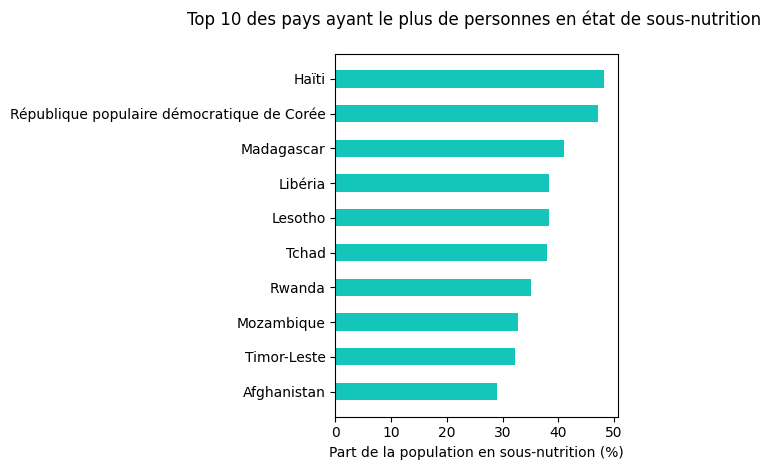

In [ ]:
# Création du graphique du Top 10 des pays eyant le plus de personnes en état de sous-nutrition
sous_nut_2017_top_10 = merge_pop_sous_nut_2017.sort_values(by='part_sous_nut', ascending=False).head(10)

x = sous_nut_2017_top_10['Zone']
y = sous_nut_2017_top_10['part_sous_nut']

plt.barh(x, y, color='#14c5ba', height=0.5)
plt.xlabel('Part de la population en sous-nutrition (%)')
plt.title("Top 10 des pays ayant le plus de personnes en état de sous-nutrition \n")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. 7 - Pays qui ont le plus bénéficiés de l'aide alimentaire depuis 2013

In [ ]:
#calcul du total de l'aide alimentaire par pays
total_aide_ali_par_pays = aide_ali.groupby(['Zone']).sum()
total_aide_ali_par_pays.head()

,Année,Produit,Valeur,Valeur Kg
Zone,,,,
Afghanistan,32216,Autres non-céréalesAutres non-céréalesBlé et F...,185452,185452000
Algérie,78561,Autres non-céréalesAutres non-céréalesAutres n...,81114,81114000
Angola,8054,Autres non-céréalesCéréalesMélanges et prépara...,5014,5014000
Bangladesh,50347,Blé et FarinBlé et FarinBlé et FarinCéréalesCé...,348188,348188000
Bhoutan,24170,CéréalesHuiles végétalesHuiles végétalesHuiles...,2666,2666000


In [ ]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
total_aide_ali_par_pays_top_10 = total_aide_ali_par_pays.sort_values(by='Valeur Kg', ascending=False).head(10)
total_aide_ali_par_pays_top_10

,Année,Produit,Valeur,Valeur Kg
Zone,,,,
République arabe syrienne,76543,Autres non-céréalesAutres non-céréalesAutres n...,1858943,1858943000
Éthiopie,66460,Autres non-céréalesAutres non-céréalesAutres n...,1381294,1381294000
Yémen,76553,Autres non-céréalesAutres non-céréalesAutres n...,1206484,1206484000
Soudan du Sud,44309,Autres non-céréalesAutres non-céréalesAutres n...,695248,695248000
Soudan,48335,Autres non-céréalesAutres non-céréalesBlé et F...,669784,669784000
Kenya,54376,Autres non-céréalesAutres non-céréalesBlé et F...,552836,552836000
Bangladesh,50347,Blé et FarinBlé et FarinBlé et FarinCéréalesCé...,348188,348188000
Somalie,54377,Autres non-céréalesAutres non-céréalesAutres n...,292678,292678000
République démocratique du Congo,50350,Autres non-céréalesAutres non-céréalesAutres n...,288502,288502000


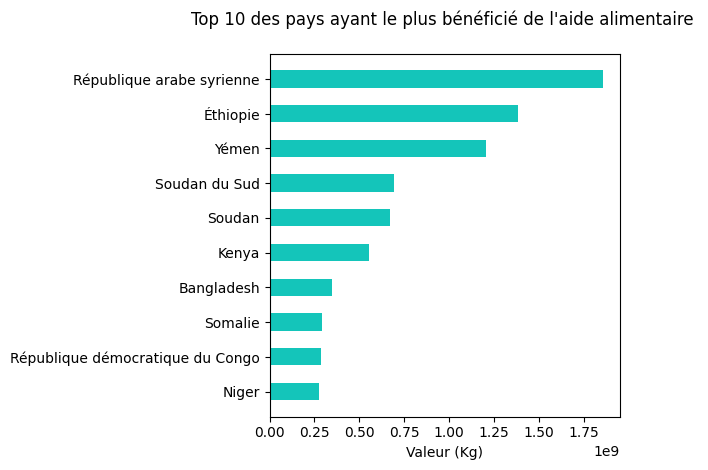

In [ ]:
# Création du graphique sur le Top 10 des pays ayant le plus bénéficié de l'aide alimentaire
total_aide_ali_par_pays_top_10 = total_aide_ali_par_pays.sort_values(by='Valeur Kg', ascending=False).head(10)

x = total_aide_ali_par_pays_top_10.index
y = total_aide_ali_par_pays_top_10['Valeur Kg']

plt.barh(x, y, color='#14c5ba', height=0.5)
plt.xlabel('Valeur (Kg)')
plt.title("Top 10 des pays ayant le plus bénéficié de l'aide alimentaire \n")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. 8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016

In [ ]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
aide_ali_grouped = aide_ali.groupby(['Zone', 'Année']).sum().reset_index()
aide_ali_grouped.head()

,Zone,Année,Produit,Valeur,Valeur Kg
0,Afghanistan,2013,Autres non-céréalesBlé et FarinCéréalesFruits ...,128238,128238000
1,Afghanistan,2014,Autres non-céréalesBlé et FarinCéréalesHuiles ...,57214,57214000
2,Algérie,2013,Autres non-céréalesCéréalesCéréales Secondaire...,35234,35234000
3,Algérie,2014,Autres non-céréalesCéréalesCéréales Secondaire...,18980,18980000
4,Algérie,2015,Autres non-céréalesCéréalesCéréales Secondaire...,17424,17424000


In [ ]:
# Filtrage du fichier aide alimentaire sur les années entre 2013 et 2016
aide_ali_grouped_2013_2016 = aide_ali_grouped[aide_ali_grouped['Année'].between(2013, 2016)]
aide_ali_grouped_2013_2016.head()

,Zone,Année,Produit,Valeur,Valeur Kg
0,Afghanistan,2013,Autres non-céréalesBlé et FarinCéréalesFruits ...,128238,128238000
1,Afghanistan,2014,Autres non-céréalesBlé et FarinCéréalesHuiles ...,57214,57214000
2,Algérie,2013,Autres non-céréalesCéréalesCéréales Secondaire...,35234,35234000
3,Algérie,2014,Autres non-céréalesCéréalesCéréales Secondaire...,18980,18980000
4,Algérie,2015,Autres non-céréalesCéréalesCéréales Secondaire...,17424,17424000


In [ ]:
aide_ali_grouped_2013_2016['Année'].value_counts()

,count
Année,
2013,72
2014,70
2015,60
2016,26


In [ ]:
# Création du datframe
aide_ali_total = aide_ali_grouped_2013_2016.groupby(['Zone']).sum().sort_values(by='Valeur', ascending=False)[:5].reset_index()
aide_ali_total.head()

,Zone,Année,Produit,Valeur,Valeur Kg
0,République arabe syrienne,8058,Autres non-céréalesBlé et FarinBulgurFarEntCér...,1858943,1858943000
1,Éthiopie,6042,Autres non-céréalesBlé et FarinBulgurFarEntCér...,1381294,1381294000
2,Yémen,8058,Autres non-céréalesBlé et FarinCéréalesHuiles ...,1206484,1206484000
3,Soudan du Sud,6042,Autres non-céréalesCéréalesCéréales Secondaire...,695248,695248000
4,Soudan,6042,CéréalesCéréales SecondairesHuiles végétalesLa...,669784,669784000


In [ ]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
Pays = list(aide_ali_total['Zone'])
Pays

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [ ]:
#On filtre sur le dataframe avec notre liste
evol_pays = aide_ali_grouped_2013_2016[aide_ali_grouped_2013_2016['Zone'].isin(Pays)]
evol_pays.head()

,Zone,Année,Produit,Valeur,Valeur Kg
157,République arabe syrienne,2013,Autres non-céréalesBlé et FarinBulgurFarEntCér...,563566,563566000
158,République arabe syrienne,2014,Autres non-céréalesBlé et FarinBulgurFarEntCér...,651870,651870000
159,République arabe syrienne,2015,Autres non-céréalesBlé et FarinBulgurFarEntCér...,524949,524949000
160,République arabe syrienne,2016,Blé et FarinBulgurFarEntCéréalesLégumineuses S...,118558,118558000
189,Soudan,2013,CéréalesCéréales SecondairesHuiles végétalesLa...,330230,330230000


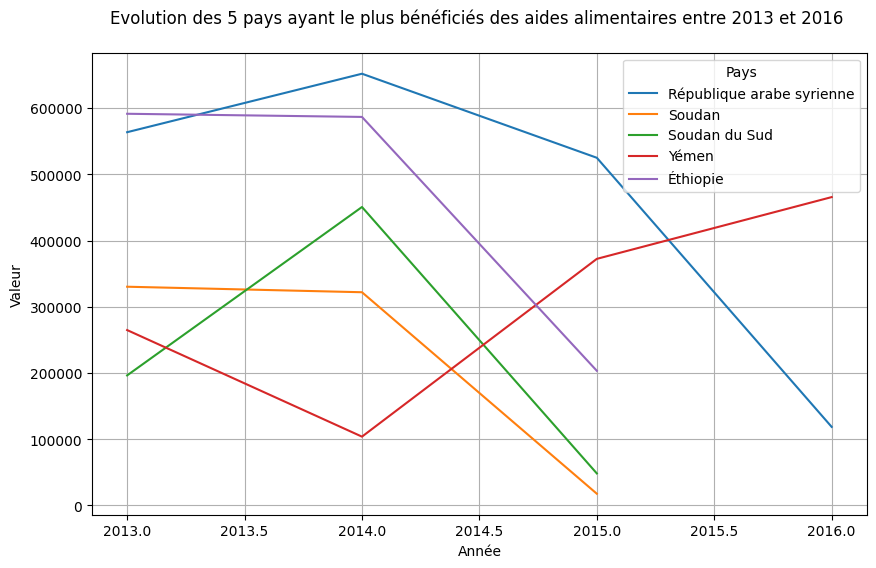

In [ ]:
# Affichage des pays avec l'aide alimentaire par année

grouped_data = evol_pays.groupby(['Année', 'Zone'])['Valeur'].sum().reset_index()

plt.figure(figsize=(10, 6))

for zone in grouped_data['Zone'].unique():
    zone_data = grouped_data[grouped_data['Zone'] == zone]
    plt.plot(zone_data['Année'], zone_data['Valeur'], label=zone)

plt.xlabel('Année')
plt.ylabel('Valeur')
plt.title('Evolution des 5 pays ayant le plus bénéficiés des aides alimentaires entre 2013 et 2016 \n')
plt.legend(title="Pays")
plt.grid(True)
plt.show()


## 3. 9 - Pays avec le moins de disponibilité par habitant

In [ ]:
#Calcul de la disponibilité en calorie par personne par jour par pays
merge_pop_dispo_ali_kcal.head()

,Zone,Année,Valeur,Population,Disponibilité alimentaire (Kcal/personne/jour),total_kcal
0,Afghanistan,2017,36296.113,36296113.000,2087.000,75749987831.000
1,Afrique du Sud,2017,57009.756,57009756.000,3020.000,172169463120.000
2,Albanie,2017,2884.169,2884169.000,3188.000,9194730772.000
3,Algérie,2017,41389.189,41389189.000,3293.000,136294599377.000
4,Allemagne,2017,82658.409,82658409.000,3503.000,289552406727.000


In [ ]:
#Affichage des 10 pays qui ont le moins de disponibilité alimentaire par personne
flop_10_dispo_ali_kcal = merge_pop_dispo_ali_kcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)
flop_10_dispo_ali_kcal

,Zone,Année,Valeur,Population,Disponibilité alimentaire (Kcal/personne/jour),total_kcal
175,République centrafricaine,2017,4596.023,4596023.000,1879.000,8635927217.000
234,Zambie,2017,16853.599,16853599.000,1924.000,32426324476.000
128,Madagascar,2017,25570.512,25570512.000,2056.000,52572972672.000
0,Afghanistan,2017,36296.113,36296113.000,2087.000,75749987831.000
87,Haïti,2017,10982.366,10982366.000,2089.000,22942162574.000
181,République populaire démocratique de Corée,2017,25429.825,25429825.000,2093.000,53224623725.000
216,Tchad,2017,15016.753,15016753.000,2109.000,31670332077.000
235,Zimbabwe,2017,14236.595,14236595.000,2113.000,30081925235.000
158,Ouganda,2017,41166.588,41166588.000,2126.000,87520166088.000
66,Éthiopie,2017,106399.924,106399924.000,2129.000,226525438196.000


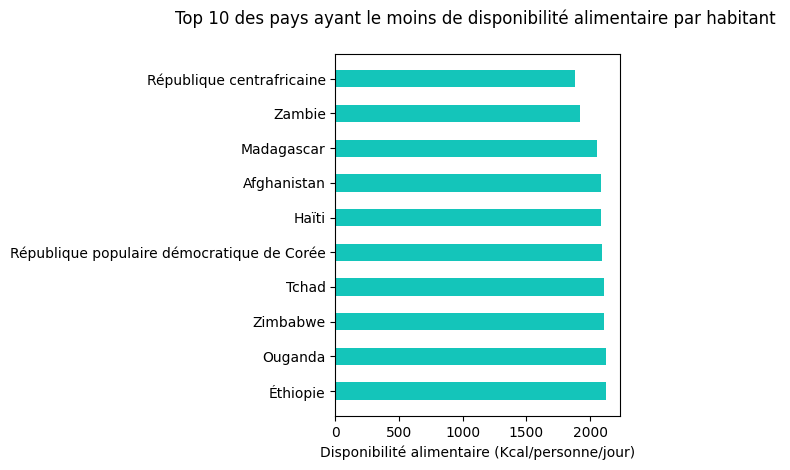

In [ ]:
#Création du graphique sur le Top 10 des pays ayant le moins de disponibilité alimentaire par habitant
flop_10_dispo_ali_kcal = merge_pop_dispo_ali_kcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

x = flop_10_dispo_ali_kcal['Zone']
y = flop_10_dispo_ali_kcal['Disponibilité alimentaire (Kcal/personne/jour)']

plt.barh(x, y, color='#14c5ba', height=0.5)
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title("Top 10 des pays ayant le moins de disponibilité alimentaire par habitant \n")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##3. 10 - Pays avec le plus de disponibilité par habitant

In [ ]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
top_10_dispo_ali_kcal = merge_pop_dispo_ali_kcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)
top_10_dispo_ali_kcal


,Zone,Année,Valeur,Population,Disponibilité alimentaire (Kcal/personne/jour),total_kcal
15,Autriche,2017,8819.901,8819901.000,3770.000,33251026770.000
22,Belgique,2017,11419.748,11419748.000,3737.000,42675598276.000
226,Turquie,2017,81116.450,81116450.000,3708.000,300779796600.000
65,États-Unis d'Amérique,2017,325084.756,325084756.000,3682.000,1196962071592.000
109,Israël,2017,8243.848,8243848.000,3610.000,29760291280.000
107,Irlande,2017,4753.279,4753279.000,3602.000,17121310958.000
110,Italie,2017,60673.701,60673701.000,3578.000,217090502178.000
126,Luxembourg,2017,591.910,591910.000,3540.000,2095361400.000
57,Égypte,2017,96442.591,96442591.000,3518.000,339285035138.000
4,Allemagne,2017,82658.409,82658409.000,3503.000,289552406727.000


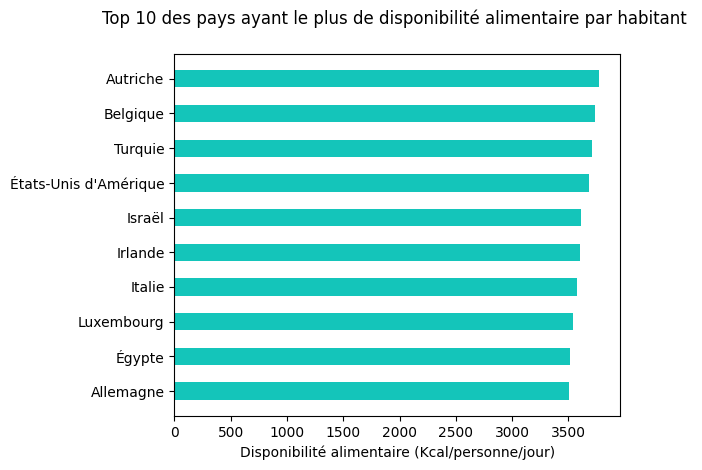

In [ ]:
# Création du graphique sur le Top 10 des pays ayant le plus de disponibilité alimentaire par habitant
top_10_dispo_ali_kcal = merge_pop_dispo_ali_kcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

x = top_10_dispo_ali_kcal['Zone']
y = top_10_dispo_ali_kcal['Disponibilité alimentaire (Kcal/personne/jour)']

plt.barh(x, y, color='#14c5ba', height=0.5)
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title("Top 10 des pays ayant le plus de disponibilité alimentaire par habitant \n")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. 11 - Exemple de la Thaïlande pour le manioc

In [ ]:
#création d'un dataframe avec uniquement la Thaïlande
dispo_ali_thailande = dispo_ali[dispo_ali['Zone']=='Thaïlande'].reset_index()
dispo_ali_thailande.head()

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations Kg,Disponibilité intérieure Kg,Exportations - Quantité Kg,Importations - Quantité Kg
0,13759,Thaïlande,Abats Comestible,animale,0.000,0.000,3.000,1.110,0.090,0.560,74.000,5.000,33.000,75.000,0.000,45.000,0.000,0.000,0.000,0.000,74000000.000,5000000.000,33000000.000
1,13760,Thaïlande,"Agrumes, Autres",vegetale,0.000,0.000,0.000,0.090,0.000,0.000,8.000,6.000,2.000,6.000,0.000,12.000,0.000,2.000,0.000,0.000,8000000.000,6000000.000,2000000.000
2,13761,Thaïlande,"Alcool, non Comestible",vegetale,0.000,358.000,0.000,0.000,0.000,0.000,358.000,110.000,21.000,0.000,0.000,447.000,0.000,0.000,0.000,358000000.000,358000000.000,110000000.000,21000000.000
3,13762,Thaïlande,Aliments pour enfants,vegetale,0.000,0.000,2.000,0.180,0.010,0.080,12.000,7.000,19.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,12000000.000,7000000.000,19000000.000
4,13763,Thaïlande,Ananas,vegetale,0.000,0.000,10.000,10.020,0.040,0.080,782.000,1449.000,9.000,671.000,110.000,2209.000,0.000,0.000,13.000,0.000,782000000.000,1449000000.000,9000000.000


In [ ]:
#Calcul de la sous nutrition en Thaïlande
part_sous_nut_thailande = merge_pop_sous_nut_2017[merge_pop_sous_nut_2017['Zone'] == 'Thaïlande']
part_sous_nut_thailande.head()

,Zone,Année_x,Valeur,Population,Année_y,sous_nutrition,sous_nutrition (x 1 million),_merge,part_sous_nut
6886,Thaïlande,2017,69209.810,69209810.000,2016-2018,6.200,6200000.000,both,8.958


In [ ]:
# Filtrage sur le produit manioc
dispo_ali_thailande_manioc = dispo_ali_thailande[dispo_ali_thailande['Produit'] == 'Manioc']
dispo_ali_thailande_manioc.head()

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations Kg,Disponibilité intérieure Kg,Exportations - Quantité Kg,Importations - Quantité Kg
50,13809,Thaïlande,Manioc,vegetale,1800.000,2081.000,40.000,13.000,0.050,0.140,6264.000,25214.000,1250.000,871.000,1511.000,30228.000,0.000,0.000,0.000,2081000000.000,6264000000.000,25214000000.000,1250000000.000


In [ ]:
# On calcule la proportion exportée en fonction de la proportion de la production
dispo_ali_thailande_manioc.loc[:, 'proportion_export'] = (dispo_ali_thailande['Exportations - Quantité'] / dispo_ali_thailande['Production']) * 100
dispo_ali_thailande_manioc.head()

<ipython-input-95-c968e9c5ad07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_ali_thailande_manioc.loc[:, 'proportion_export'] = (dispo_ali_thailande['Exportations - Quantité'] / dispo_ali_thailande['Production']) * 100


,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations Kg,Disponibilité intérieure Kg,Exportations - Quantité Kg,Importations - Quantité Kg,proportion_export
50,13809,Thaïlande,Manioc,vegetale,1800.000,2081.000,40.000,13.000,0.050,0.140,6264.000,25214.000,1250.000,871.000,1511.000,30228.000,0.000,0.000,0.000,2081000000.000,6264000000.000,25214000000.000,1250000000.000,83.413


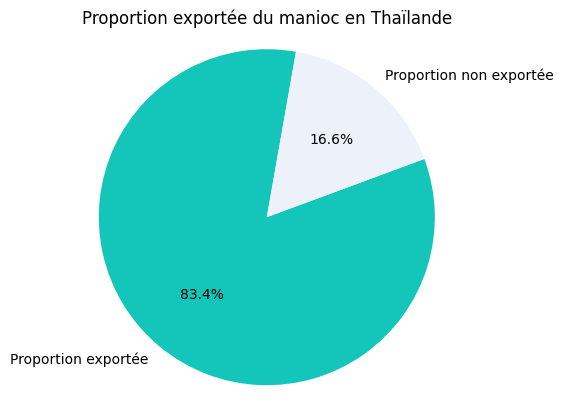

In [ ]:
# Création du graphique sur la proportion exportée du manioc en Thaïlande
y = np.array([dispo_ali_thailande_manioc['proportion_export'].sum(), (100-dispo_ali_thailande_manioc['proportion_export'].sum())])
thailande_manioc_labels = ["Proportion exportée", "Proportion non exportée"]
couleurs = ['#14c5ba', '#edf2fa']

plt.pie(y, labels=thailande_manioc_labels, autopct='%1.1f%%', startangle=80, colors=couleurs)
plt.title("Proportion exportée du manioc en Thaïlande")
plt.axis('equal')
plt.show()

# Etape 6 - Analyse complémentaire

In [ ]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de Mélanie et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté au niveau alimentaire"

In [ ]:
# Analyse complémentaire avec un focus sur les pertes
# Quels sont les produits avec le plus de pertes ?
# Taux de pertes en disponibilité intérieure = pertes / disponibilité intérieure
# Focus sur le produit ayant le plus de pertes
# Taux de pertes en production =  pertes / production

In [ ]:
#quels sont les produits avec le plus de pertes ?
#nouvelle table avec le détail des produits
pertes_par_pays = dispo_ali[['Zone', 'Origine', 'Produit', 'Pertes', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Production']].copy()
pertes_par_pays.head()

,Zone,Origine,Produit,Pertes,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,animale,Abats Comestible,0.000,53.000,0.000,0.000,53.000
1,Afghanistan,vegetale,"Agrumes, Autres",2.000,41.000,2.000,40.000,3.000
2,Afghanistan,vegetale,Aliments pour enfants,0.000,2.000,0.000,2.000,0.000
3,Afghanistan,vegetale,Ananas,0.000,0.000,0.000,0.000,0.000
4,Afghanistan,vegetale,Bananes,0.000,82.000,0.000,82.000,0.000


In [ ]:
#top 10 des taux de pertes par produit (tout produit confondu)
taux_de_pertes_dispo_int = (pertes_par_pays['Pertes'] / pertes_par_pays['Disponibilité intérieure']) * 100
pertes_par_pays.loc[:, 'taux_pertes_dispo_int'] = taux_de_pertes_dispo_int
pertes_par_pays.loc[:, 'taux_pertes_production'] = (pertes_par_pays['Pertes'] / pertes_par_pays['Production']) * 100
pertes_par_pays.sort_values(by='taux_pertes_dispo_int', ascending=False).head(10)

,Zone,Origine,Produit,Pertes,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux_pertes_dispo_int,taux_pertes_production
7308,Kenya,vegetale,Ananas,13.000,12.000,146.000,1.000,129.000,108.333,10.078
3652,Costa Rica,vegetale,Ananas,483.000,460.000,2301.000,3.000,2685.000,105.000,17.989
2871,Canada,vegetale,"Plantes Oleiferes, Autre",22.000,21.000,707.000,74.000,754.000,104.762,2.918
4436,Espagne,vegetale,Pamplemousse,1.000,1.000,86.000,21.000,59.000,100.000,1.695
12904,Slovénie,vegetale,Citrons & Limes,1.000,1.000,8.000,9.000,0.000,100.000,inf
13935,Togo,vegetale,"Céréales, Autres",1.000,1.000,3.000,0.000,4.000,100.000,25.000
9612,Nicaragua,vegetale,Café,1.000,1.000,98.000,2.000,84.000,100.000,1.190
2733,Cameroun,vegetale,Feve de Cacao,55.000,66.000,214.000,1.000,275.000,83.333,20.000
5703,Guinée-Bissau,vegetale,Noix,22.000,27.000,196.000,0.000,200.000,81.481,11.000
6004,Honduras,vegetale,Ananas,70.000,88.000,63.000,12.000,139.000,79.545,50.360


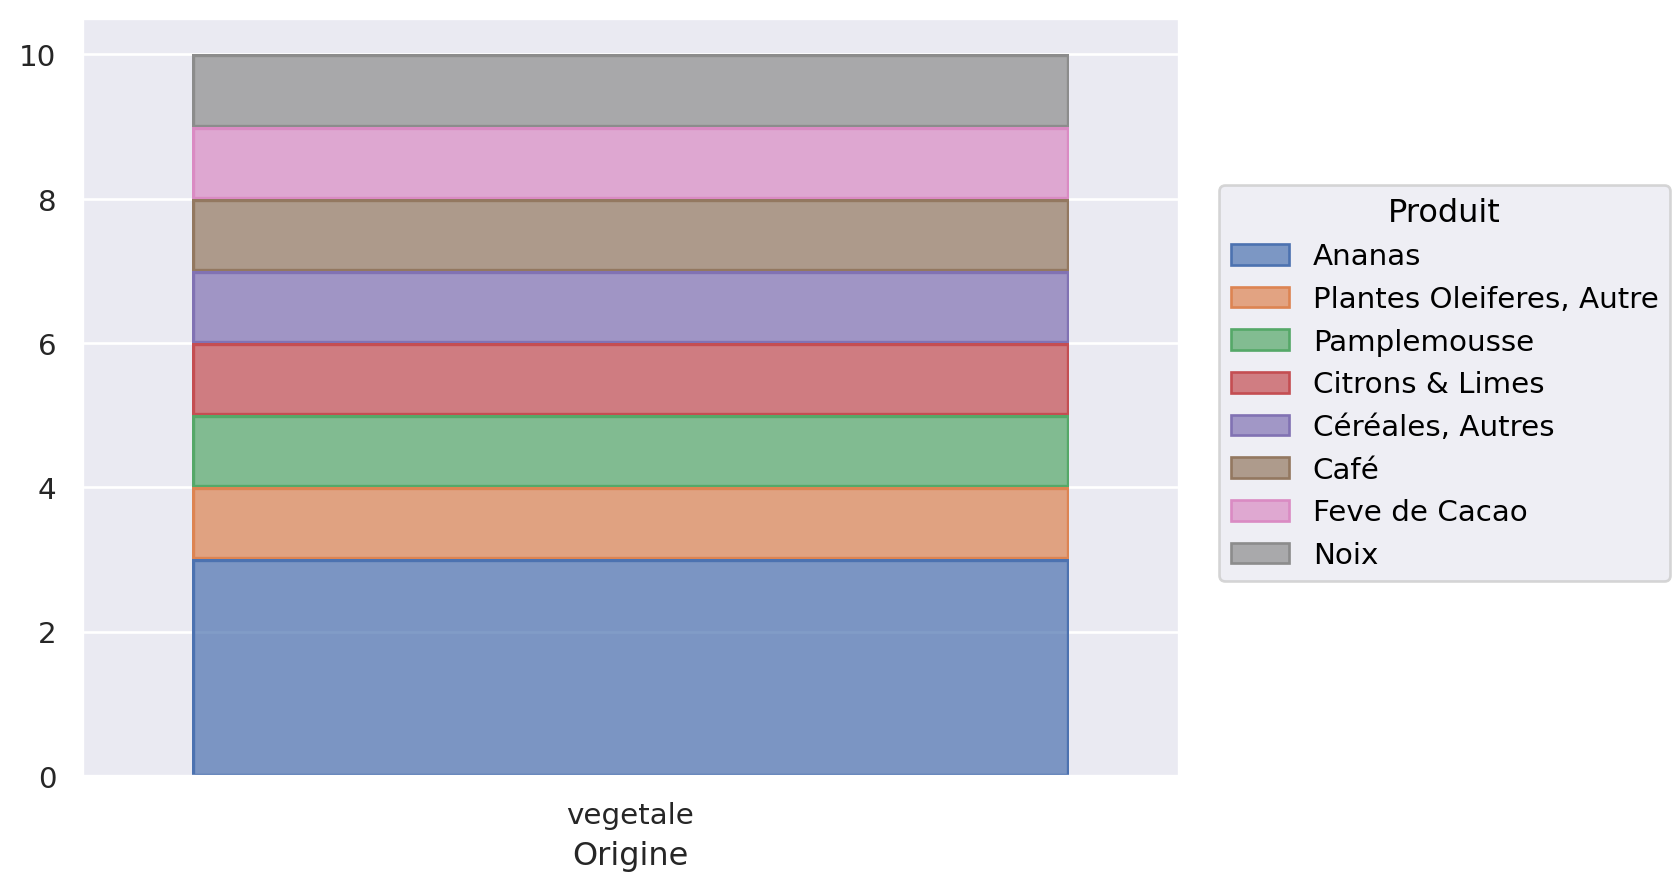

In [ ]:
#graphique répartition des pertes végétales par disponibilité intérieure
taux_pertes_produit_vegetal = pertes_par_pays[pertes_par_pays['Origine']=='vegetale'].sort_values(by='taux_pertes_dispo_int', ascending=False).head(10)

so.Plot(taux_pertes_produit_vegetal, x="Origine", color="Produit").add(so.Bar(), so.Count(), so.Stack())


In [ ]:
#top 10 pertes en production d'ananas par pays
pertes_par_pays[(pertes_par_pays['Produit']=='Ananas') & (pertes_par_pays['taux_pertes_production']>0) & (pertes_par_pays['Production']!=0)].sort_values(by='taux_pertes_production', ascending=False).head(10)

,Zone,Origine,Produit,Pertes,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux_pertes_dispo_int,taux_pertes_production
11723,République de Corée,vegetale,Ananas,4.000,96.000,0.000,95.000,1.000,4.167,400.000
7026,Japon,vegetale,Ananas,19.000,250.000,0.000,243.000,7.000,7.600,271.429
11171,Portugal,vegetale,Ananas,2.000,57.000,25.000,78.000,3.000,3.509,66.667
6004,Honduras,vegetale,Ananas,70.000,88.000,63.000,12.000,139.000,79.545,50.360
4281,El Salvador,vegetale,Ananas,1.000,4.000,45.000,21.000,2.000,25.000,50.000
3932,Côte d'Ivoire,vegetale,Ananas,29.000,46.000,28.000,2.000,72.000,63.043,40.278
704,Argentine,vegetale,Ananas,1.000,41.000,0.000,38.000,3.000,2.439,33.333
15344,États-Unis d'Amérique,vegetale,Ananas,57.000,2089.000,131.000,2049.000,171.000,2.729,33.333
3467,Colombie,vegetale,Ananas,161.000,641.000,4.000,2.000,643.000,25.117,25.039
5483,Guatemala,vegetale,Ananas,49.000,177.000,104.000,37.000,244.000,27.684,20.082


<function matplotlib.pyplot.show(close=None, block=None)>

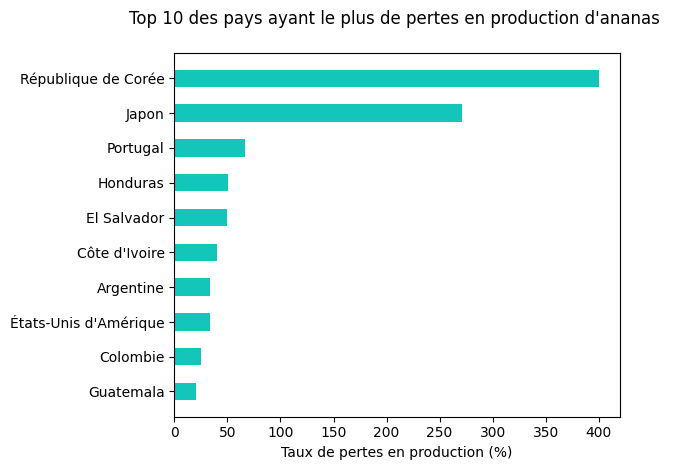

In [ ]:
#graphique du top 10 pertes en production d'ananas
top_10_pays_pertes_production_ananas = pertes_par_pays[(pertes_par_pays['Produit']=='Ananas') & (pertes_par_pays['taux_pertes_production']>0) & (pertes_par_pays['Production']!=0)].sort_values(by='taux_pertes_production', ascending=False).head(10)

x = top_10_pays_pertes_production_ananas['Zone']
y = top_10_pays_pertes_production_ananas['taux_pertes_production'].sort_values(ascending=False)

plt.barh(x, y, color ='#14c5ba', height=0.5)
plt.xlabel('Taux de pertes en production (%)')
plt.title("Top 10 des pays ayant le plus de pertes en production d'ananas \n")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show

In [ ]:
#top 10 pays producteurs d'ananas
top_10_pays_prod_ananas = pertes_par_pays[(pertes_par_pays['Produit']=='Ananas') & (pertes_par_pays['Production']!=0)].sort_values(by='Production', ascending=False)
top_10_pays_prod_ananas.head(10)

,Zone,Origine,Produit,Pertes,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,taux_pertes_dispo_int,taux_pertes_production
3652,Costa Rica,vegetale,Ananas,483.000,460.000,2301.000,3.000,2685.000,105.000,17.989
2082,Brésil,vegetale,Ananas,492.000,2449.000,10.000,1.000,2458.000,20.090,20.016
10895,Philippines,vegetale,Ananas,123.000,1189.000,1462.000,1.000,2458.000,10.345,5.004
13763,Thaïlande,vegetale,Ananas,110.000,782.000,1449.000,9.000,2209.000,14.066,4.980
6288,Indonésie,vegetale,Ananas,147.000,1509.000,329.000,1.000,1837.000,9.742,8.002
6191,Inde,vegetale,Ananas,0.000,1571.000,3.000,4.000,1571.000,0.000,0.000
9787,Nigéria,vegetale,Ananas,142.000,1427.000,0.000,7.000,1420.000,9.951,10.000
3277,"Chine, continentale",vegetale,Ananas,71.000,1431.000,42.000,87.000,1386.000,4.962,5.123
9063,Mexique,vegetale,Ananas,77.000,739.000,69.000,36.000,772.000,10.419,9.974
3467,Colombie,vegetale,Ananas,161.000,641.000,4.000,2.000,643.000,25.117,25.039
